## Descrition

- Course: STAT638, 2022Fall
- Deadline: 2022/10/29, 12:01 pm
> Read Chapter 10 in the Hoff book

*Source code is shown here: [https://stchiu.quarto.pub/stat638__hw10/](https://stchiu.quarto.pub/stat638__hw10/)*

## Computational Environment

### Libraries


In [1]:
cd(@__DIR__)
using Pkg
Pkg.activate("hw10")

using Statistics 
using Distributions
using LinearAlgebra
using KernelDensity
using Plots

  Activating project at `~/Documents/GitHub/STAT638_Applied-Bayes-Methods/hw/hw10`


### Version


In [2]:
Pkg.status()
VERSION

Status `~/Documents/GitHub/STAT638_Applied-Bayes-Methods/hw/hw10/Project.toml`
  [31c24e10] Distributions v0.25.79
  [5ab0869b] KernelDensity v0.6.5
⌃ [91a5bcdd] Plots v1.36.3
  [10745b16] Statistics
Info Packages marked with ⌃ have new versions available and may be upgradable.


v"1.8.2"

## Problem HW10-1

> Assume we have $4$ observations, $(-1,0,1,10)$, where the last observation can be thought of as an outlier. Assume that conditional on an unknown parameter $\theta$, the data area i.i.d. from some population distribution. Assume a standard normal prior for $\theta$.

### (1)

> First, assume that the population distribution is a normal distribution with mean $\theta$ and variance $1$. Draw samples from the posterior of $\theta$ using a Metropolis algorithm and also derive the exact posterior in closed form.


**Exact**



$$\theta \sim Normal(\mu=0, \tau^{2}=1)$$
$$Y \sim Normal(\theta, \sigma^2 = 1)$$

\begin{align}
  P(\theta | y, \sigma^2)%
  &\sim Normal(\mu_n, \tau_{n}^2)
\end{align}

- $\mu_n = \bar{y}\frac{n/\sigma^2}{n/\sigma^2 + 1/\tau^2} + \mu \frac{1/\tau^2}{n/\sigma^2 + 1/\tau^2}$
- $\tau^{2}_{n} = \frac{1}{n/\sigma^2 + 1/\tau^2}$


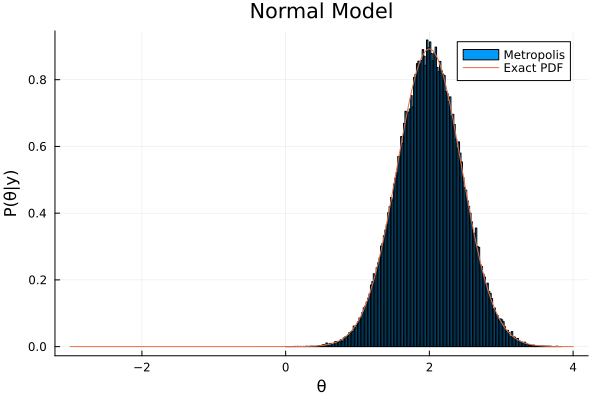

In [3]:
ys = [-1., 0., 1., 10.]



θ = Normal()
k = 300000
δ² = 1.

function sampling_ma(like_dist, θ, k, δ²)
    θs = zeros(k)
    th = 0.
    for i in 1:k 
        θᵒ = th
        J = Normal(θᵒ, δ²)
        θʷ = rand(J)
        r_log = sum(logpdf.( like_dist(θʷ, 1), ys) .- logpdf.( like_dist(θᵒ, 1), ys)) + logpdf(θ, θʷ) - logpdf(θ, θᵒ)

        # Accept
        u_log = log(rand(Uniform()))
        if r_log > u_log 
            θs[i] = θʷ
        else 
            θs[i] = θᵒ
        end 
        th = θs[i]
    end
    return θs
end

θs_n = sampling_ma(Normal, θ, k, δ²)

# Exact PDF
n = length(ys)
τₙ =( 1 / (n/ 1 + 1/ 1)^0.5)
μₙ = mean(ys) * (n / 1) / (n/ 1 + 1/1) + 0 
θ_exact = Normal(μₙ, τₙ )
xs = collect(-3:0.01:4)
ys_exact = pdf.(θ_exact, xs)

# Display
p = histogram(θs_n, normalize=:pdf, xlabel="θ", ylabel="P(θ|y)", label="Metropolis", title="Normal Model")
plot!(p, xs, ys_exact, label="Exact PDF")

### (2)

> Now assume the population distribution is a Cauchy distribution with location parameter $\theta$ and scale $1$. (This is equivalent to a nonstandardized t distribution with one degree of freedom and location parameter $\theta$.) Draw samples from the posterior using the Metropolis algorithm.


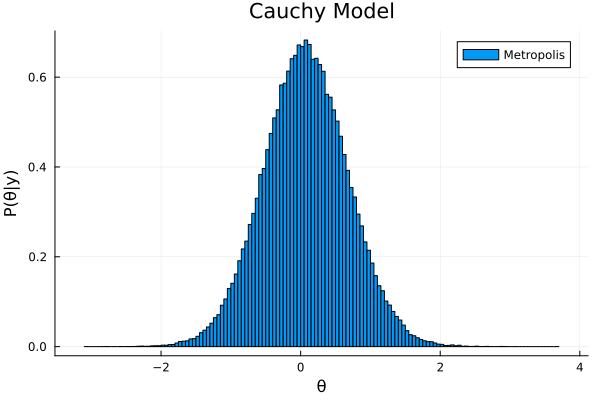

In [4]:
θs_c = sampling_ma(Cauchy, θ, k, δ²)
p2 = histogram(θs_c, normalize=:pdf, xlabel="θ", ylabel="P(θ|y)", label="Metropolis", title="Cauchy Model")

display(p2)

### (3)

> Plot the exact posterior density from part $1$, together with kernel density estimates from the two Metropolis samplers. Describe how the outlier has affected the posteriors.

Cauchy distribution as likelihood distribution is less sensitive to the outliers than Normal distribution.


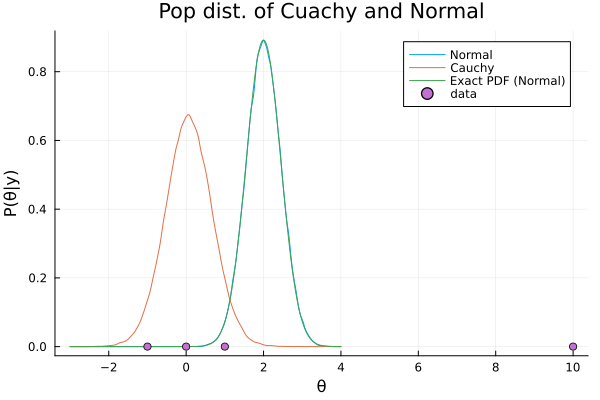

In [5]:
Un = kde(θs_n)
Uc = kde(θs_c)
pdf_n = [pdf(Un, x) for x in xs]
pdf_c = [pdf(Uc, x) for x in xs]
p3 = plot(xlabel="θ", ylabel="P(θ|y)", title="Pop dist. of Cuachy and Normal")
plot!(p3, xs, pdf_n, label="Normal")
plot!(p3, xs, pdf_c, label="Cauchy")
plot!(p3, xs, ys_exact, label="Exact PDF (Normal)")
scatter!(p3, ys, zeros(length(ys)), label="data")
display(p3)